In [2]:
df = pd.read_csv('Tomato.csv')
df

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato
...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato


# Casting data type and lower columns name

In [3]:
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [4]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2741 non-null   datetime64[ns]
 1   unit     2741 non-null   object        
 2   minimum  2741 non-null   int64         
 3   maximum  2741 non-null   int64         
 4   average  2741 non-null   float64       
 5   market   2741 non-null   object        
 6   month    2741 non-null   int64         
 7   year     2741 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 171.4+ KB


None

,date,unit,minimum,maximum,average,market,month,year
0,2013-06-16,Kg,26,32,29.0,Tomato,6,2013
1,2013-06-17,Kg,20,25,22.5,Tomato,6,2013
2,2013-06-18,Kg,22,26,24.0,Tomato,6,2013
3,2013-06-19,Kg,24,28,26.0,Tomato,6,2013
4,2013-06-20,Kg,22,26,24.0,Tomato,6,2013


# Disribution of maximum, minimum and average prices

<AxesSubplot:title={'center':'Distribution of Tomato daily minimal prices'}, ylabel='Frequency'>

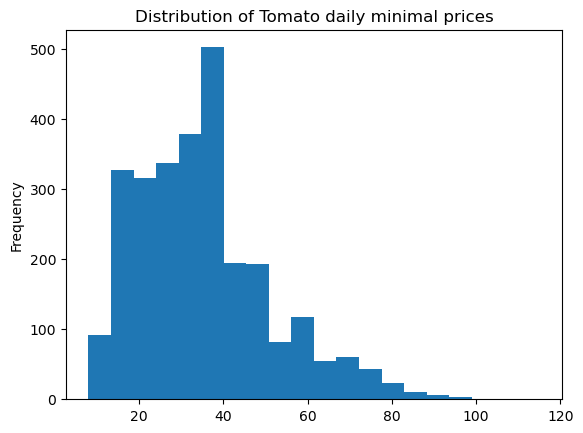

In [5]:
df['minimum'].plot(kind='hist', bins=20, title='Distribution of Tomato daily minimal prices')

<AxesSubplot:title={'center':'Distribution of Tomato daily maximum prices'}, ylabel='Frequency'>

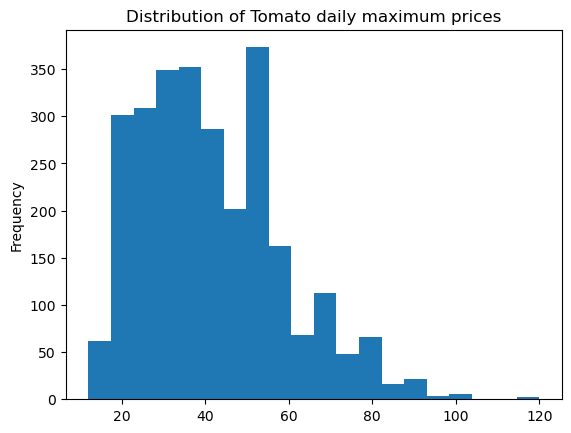

In [6]:
df['maximum'].plot(kind='hist', bins=20, title='Distribution of Tomato daily maximum prices')

<AxesSubplot:title={'center':'Distribution of Tomato daily average prices'}, ylabel='Frequency'>

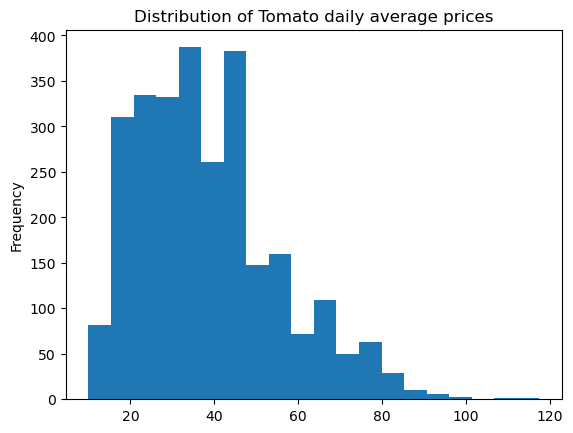

In [7]:
df['average'].plot(kind='hist', bins=20, title='Distribution of Tomato daily average prices')

# Grouping Price Category

```Category tomato prices in nepal based on chatGPT
Low if < 50 per KG
Medium price > 50 per KG and < 150 per KG
High price > 150 per KG```

<AxesSubplot:title={'center':'Tomato price results category (2013-2021)'}>

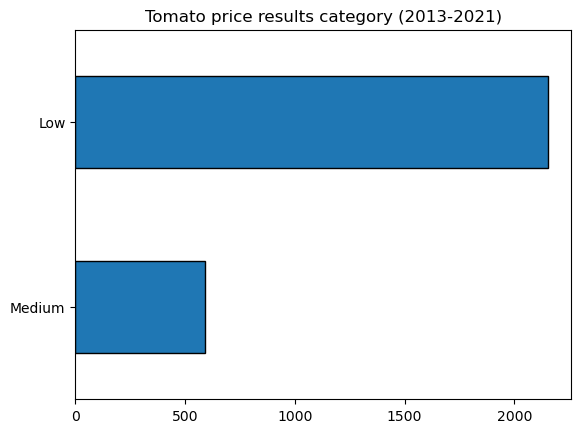

In [8]:
df['price_category'] = None
df.loc[df['average'] <= 50, 'price_category'] = 'Low'
df.loc[df['average'] > 50, 'price_category'] = 'Medium'
df['price_category'].value_counts().sort_index(ascending = False).plot(kind='barh', title="Tomato price results category (2013-2021)", edgecolor='black')

# What is the distribution category by Year and month?

In [9]:
df_ag = df.groupby('month')['price_category'].value_counts().unstack().fillna(0)
df_ag.style.background_gradient(cmap = 'Blues')

price_category,Low,Medium
month,,
1,237.000000,0.000000
2,215.000000,0.000000
3,187.000000,39.000000
4,212.000000,6.000000
5,146.000000,73.000000
6,181.000000,35.000000
7,176.000000,65.000000
8,136.000000,101.000000
9,180.000000,52.000000


In [10]:
df_ag = df.groupby('year')['price_category'].value_counts().unstack().fillna(0)
df_ag.style.background_gradient(cmap = 'Blues')

price_category,Low,Medium
year,,
2013,119.000000,37.000000
2014,284.000000,27.000000
2015,255.000000,97.000000
2016,239.000000,125.000000
2017,264.000000,89.000000
2018,342.000000,21.000000
2019,244.000000,119.000000
2020,274.000000,75.000000
2021,130.000000,0.000000


In [11]:
df_ag = df.groupby(['month', 'year'])['price_category'].value_counts().unstack().fillna(0)
df_ag.style.background_gradient(cmap = 'Blues')

# Example Bar and line plot from maximum and minimum price for 20 data in 2019

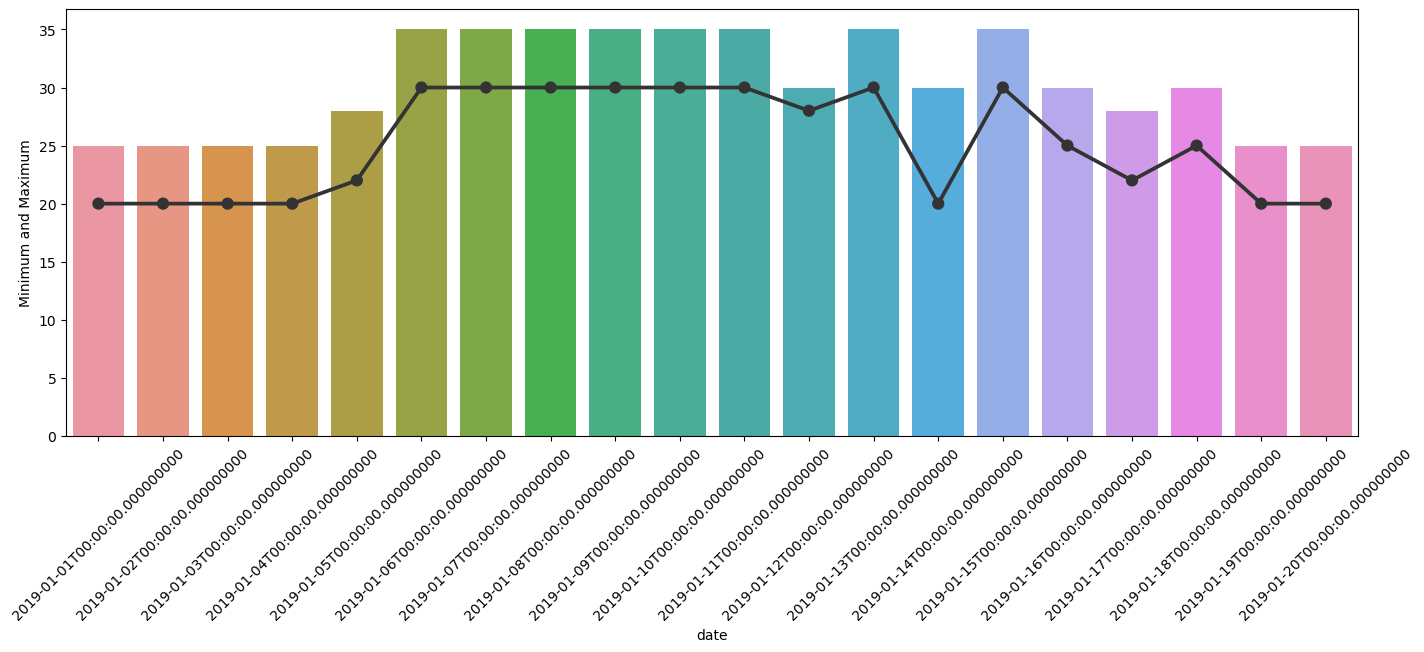

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1

sns.barplot(x='date', y='maximum', data=df.query('year == 2019')[:20], ax=ax1) # on primary ax1
sns.pointplot(x='date', y='minimum', color='#333', data=df.query('year == 2019')[:20], ax=ax2)

plt.ylabel("Minimum and Maximum")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Tomato price when covid hit nepal?
Per : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9321054/


```On 23 January 2020, the Ministry of Health and Population (MoHP) officially declared this as the first case of COVID-19 in Nepal```


Based on data there is no impact for tomato price when covid hit nepal on 23 january 2020, even on 24 january 2020 hit the lowest price.

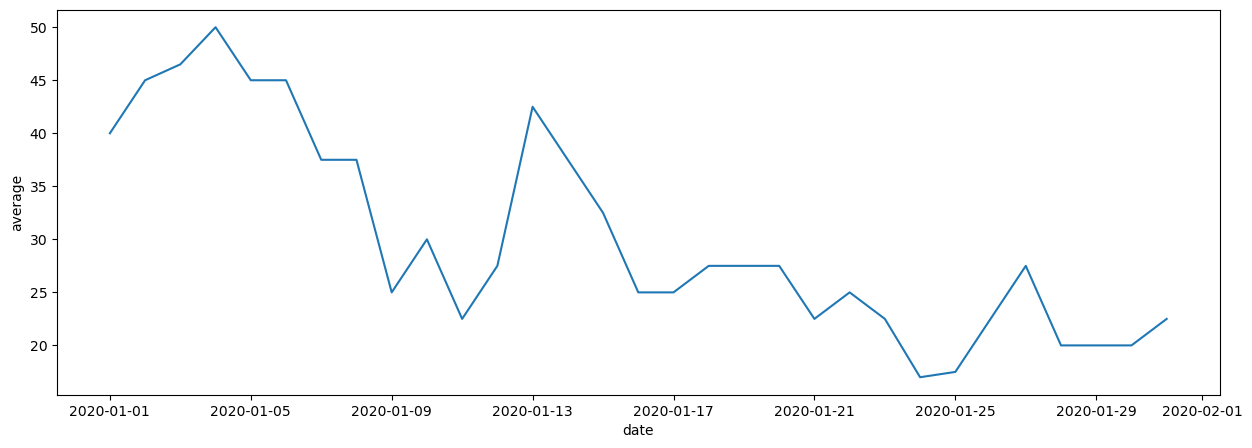

In [13]:
covid_hit = df.query('year == 2020 and month == 1')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = covid_hit, x = 'date', y= 'average', ax=ax)
plt.show()

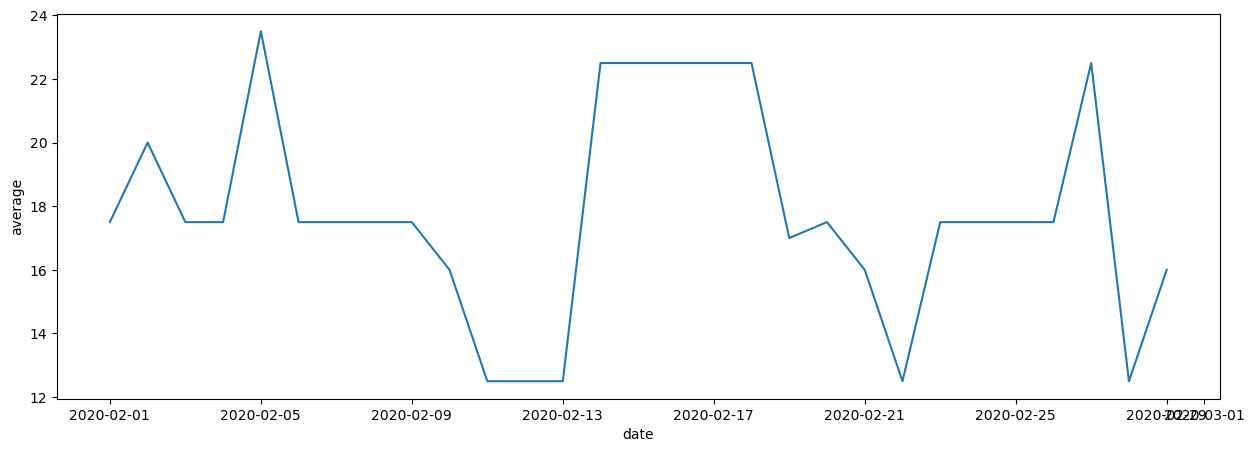

In [14]:
covid_hit = df.query('year == 2020 and month == 2')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = covid_hit, x = 'date', y= 'average', ax=ax)
plt.show()